# Practical Application III: Comparing Classifiers

**Overview**: In this practical application, your goal is to compare the performance of the classifiers we encountered in this section, namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines.  We will utilize a dataset related to marketing bank products over the telephone.  



### Getting Started

Our dataset comes from the UCI Machine Learning repository [link](https://archive.ics.uci.edu/ml/datasets/bank+marketing).  The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns.  We will make use of the article accompanying the dataset [here](CRISP-DM-BANK.pdf) for more information on the data and features.



### Problem 1: Understanding the Data

To gain a better understanding of the data, please read the information provided in the UCI link above, and examine the **Materials and Methods** section of the paper.  How many marketing campaigns does this data represent?

In [4]:
2 # One over the phone and another one using the online banking channel 

2

### Problem 2: Read in the Data

Use pandas to read in the dataset `bank-additional-full.csv` and assign to a meaningful variable name.

In [6]:
import pandas as pd

In [7]:
df = pd.read_csv('data/bank-additional-full.csv', sep = ';')

In [8]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### Problem 3: Understanding the Features


Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.


```
Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')
```



### Problem 4: Understanding the Task

After examining the description and data, your goal now is to clearly state the *Business Objective* of the task.  State the objective below.

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

# Business Objective
Develop a predictive machine learning model using data from a Portuguese banking institution’s marketing campaigns to estimate the probability that a customer will subscribe to a term deposit, enabling the bank to prioritize contacts and improve campaign efficiency while reducing operational costs.

### Problem 5: Engineering Features

Now that you understand your business objective, we will build a basic model to get started.  Before we can do this, we must work to encode the data.  Using just the bank information features, prepare the features and target column for modeling with appropriate encoding and transformations.

In [14]:
df.shape

(41188, 21)

In [15]:
# Drop the target column
X = df.drop(columns=['y'], axis=1)

# Keep only the target column
y = df.y

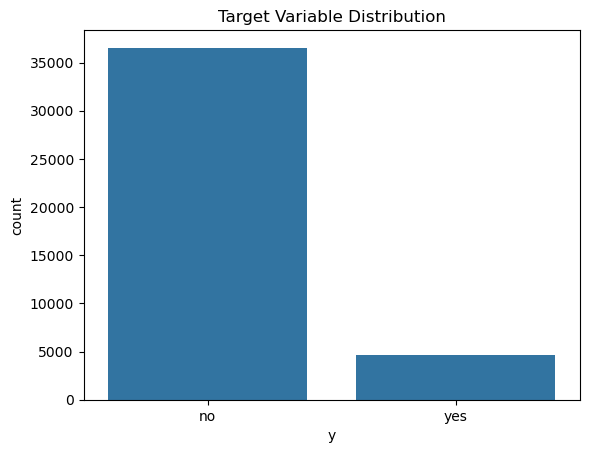

,proportion
y,
no,0.887346
yes,0.112654


In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x=df['y'])
plt.title("Target Variable Distribution")
plt.show()

# Numeric breakdown
df['y'].value_counts(normalize=True).to_frame(name='proportion')

### Problem 6: Train/Test Split

With your data prepared, split it into a train and test set.

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
# Split data into train and test data - using stratify because the target variable has imbalanced classes 89% no and 11% yes
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y)

### Problem 7: A Baseline Model

Before we build our first model, we want to establish a baseline.  What is the baseline performance that our classifier should aim to beat?

In [21]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score


In [22]:
# Create dummy clasifier to generate our baseline
dummy_model = DummyClassifier().fit(X_train, y_train)
dummy_score = dummy_model.score(X_test, y_test)

print(f'Baseline score that our classifier should aim to beat is {dummy_score}')

Baseline score that our classifier should aim to beat is 0.8873458288821987


### Problem 8: A Simple Model

Use Logistic Regression to build a basic model on your data.  

In [24]:
from sklearn.linear_model import LogisticRegression
import time
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline

# select only the object type columns to apply one hot encoder
selector = make_column_selector(dtype_include=object)
transformer = make_column_transformer(
    (OneHotEncoder(drop='first'), selector),
    remainder=StandardScaler()
)

############# Logistic Regression #############

# Fit LogisticRegression model and get the accuracy
lr_start_time = time.time()
lr_pipe = Pipeline([
    ('transformer', transformer),
    ('lr', LogisticRegression())
])
lr_pipe.fit(X_train, y_train)

lr_end_time = time.time()

lr_train_accuracy = lr_pipe.score(X_train, y_train)
lr_test_accuracy = lr_pipe.score(X_test, y_test)


print(f'LogisticRegression test accuracy is {lr_test_accuracy}')

LogisticRegression test accuracy is 0.9130814800427309


### Problem 9: Score the Model

What is the accuracy of your model?

In [26]:
lr_test_accuracy

0.9130814800427309

### Problem 10: Model Comparisons

Now, we aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models.  Using the default settings for each of the models, fit and score each.  Also, be sure to compare the fit time of each of the models.  Present your findings in a `DataFrame` similar to that below:

| Model | Train Time | Train Accuracy | Test Accuracy |
| ----- | ---------- | -------------  | -----------   |
|     |    |.     |.     |

In [28]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.compose import ColumnTransformer
import time

############# KNN #############
# capture time before training the model
knn_start_time = time.time()
# train the model using train data
knn_pipe = Pipeline([
    ('transformer', transformer),
    ('knn', KNeighborsClassifier())
])
knn_pipe.fit(X_train, y_train)
# capture time after training the model
knn_end_time = time.time()

# score both train and test data
knn_train_accuracy = knn_pipe.score(X_train, y_train)
knn_test_accuracy = knn_pipe.score(X_test, y_test)

############# Decision Tree #############
# creating preprocessor for decision tree pipeline, 
# we cannot use the one we are using above because we do not need to scale the data for a decision tree
# encode categorical variables
object_columns = df.select_dtypes(include='object').columns.tolist()
object_columns.remove('y')
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

preprocessor = ColumnTransformer(transformers=[
    ('cat', OneHotEncoder(handle_unknown='ignore'), object_columns),
    ('num', 'passthrough', numerical_columns)
])

# capture time before training the model
dt_start_time = time.time()
# train the model using train data
dt_pipe = Pipeline([
    ('preprocessor', preprocessor),
    ('dt', DecisionTreeClassifier())
])
dt_pipe.fit(X_train, y_train)
# capture time after training the model
dt_end_time = time.time()

# score both train and test data
dt_train_accuracy = dt_pipe.score(X_train, y_train)
dt_test_accuracy = dt_pipe.score(X_test, y_test)

############# SVM #############

# capture time before training the model
svm_start_time = time.time()
# train the model using train data
svm_pipe = Pipeline([
    ('transformer', transformer),
    ('svm', SVC(probability=True))
])
svm_pipe.fit(X_train, y_train)
# capture time after training the model
svm_end_time = time.time()

# score both train and test data
svm_train_accuracy = svm_pipe.score(X_train, y_train)
svm_test_accuracy = svm_pipe.score(X_test, y_test)


############# RESULT OF MODELS ABOVE #############

result = {
    'Model': ['LogisticRegression', 'KNN', 'Decision Tree', 'SVM'],
    'Train Time': [lr_end_time - lr_start_time, knn_end_time - knn_start_time, dt_end_time - dt_start_time, svm_end_time - svm_start_time],
    'Train Accuracy': [lr_train_accuracy, knn_train_accuracy, dt_train_accuracy, svm_train_accuracy],
    'Test Accuracy': [lr_test_accuracy, knn_test_accuracy, dt_test_accuracy, svm_test_accuracy]
}

df_result = pd.DataFrame(result)
df_result

,Model,Train Time,Train Accuracy,Test Accuracy
0,LogisticRegression,0.323195,0.911010,0.913081
1,KNN,0.095740,0.928911,0.900942
2,Decision Tree,0.249343,1.000000,0.890842
3,SVM,56.062348,0.921531,0.912984


### Problem 11: Improving the Model

Now that we have some basic models on the board, we want to try to improve these.  Below, we list a few things to explore in this pursuit.

- More feature engineering and exploration.  For example, should we keep the gender feature?  Why or why not?
- Hyperparameter tuning and grid search.  All of our models have additional hyperparameters to tune and explore.  For example the number of neighbors in KNN or the maximum depth of a Decision Tree.  
- Adjust your performance metric

In [30]:
############# FEATURE ENGINEERING #############

# For feature engineering I am analyzing the success rates per feature category.
for col in object_columns:
    print(f"\nFeature: {col}")
    display(df.groupby(col)['y'].value_counts(normalize=True).unstack())


Feature: job


y,no,yes
job,,
admin.,0.870274,0.129726
blue-collar,0.931057,0.068943
entrepreneur,0.914835,0.085165
housemaid,0.900000,0.100000
management,0.887825,0.112175
retired,0.747674,0.252326
self-employed,0.895144,0.104856
services,0.918619,0.081381
student,0.685714,0.314286



Feature: marital


y,no,yes
marital,,
divorced,0.896791,0.103209
married,0.898427,0.101573
single,0.859959,0.140041
unknown,0.850000,0.150000



Feature: education


y,no,yes
education,,
basic.4y,0.897510,0.102490
basic.6y,0.917976,0.082024
basic.9y,0.921754,0.078246
high.school,0.891645,0.108355
illiterate,0.777778,0.222222
professional.course,0.886515,0.113485
university.degree,0.862755,0.137245
unknown,0.854997,0.145003



Feature: default


y,no,yes
default,,
no,0.87121,0.12879
unknown,0.94847,0.05153
yes,1.00000,NaN



Feature: housing


y,no,yes
housing,,
no,0.891204,0.108796
unknown,0.891919,0.108081
yes,0.883806,0.116194



Feature: loan


y,no,yes
loan,,
no,0.886598,0.113402
unknown,0.891919,0.108081
yes,0.890685,0.109315



Feature: contact


y,no,yes
contact,,
cellular,0.852624,0.147376
telephone,0.947687,0.052313



Feature: month


y,no,yes
month,,
apr,0.795213,0.204787
aug,0.893979,0.106021
dec,0.510989,0.489011
jul,0.909534,0.090466
jun,0.894885,0.105115
mar,0.494505,0.505495
may,0.935653,0.064347
nov,0.898561,0.101439
oct,0.561281,0.438719



Feature: day_of_week


y,no,yes
day_of_week,,
fri,0.891913,0.108087
mon,0.900517,0.099483
thu,0.878812,0.121188
tue,0.882200,0.117800
wed,0.883329,0.116671



Feature: poutcome


y,no,yes
poutcome,,
failure,0.857714,0.142286
nonexistent,0.911678,0.088322
success,0.348871,0.651129


In [31]:

# Based on the results above, I am removing the features that do not provide much predictive power 
# because they have very similar success rate across all categories

features_to_drop = ['default', 'housing', 'loan', 'day_of_week', 'duration'] # excluding duration since it is a leakage var
df_reduced = df.drop(columns=features_to_drop)

In [32]:
# Generating test/train data with new reduced df
# Drop the target column
X = df_reduced.drop(columns=['y'], axis=1)

# Keep only the target column
y = df_reduced.y

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y)

In [34]:
############# HYPERPARAMETER TUNNING #############
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score

############# Helper Function for Evaluation #############
def evaluate_auc(model, X_train, y_train, X_test, y_test):
    y_train_proba = model.predict_proba(X_train)[:, 1]
    y_test_proba = model.predict_proba(X_test)[:, 1]
    return roc_auc_score(y_train, y_train_proba), roc_auc_score(y_test, y_test_proba)


############# Logistic Regression GRID SEARCH #############
lr_params = {
    'lr__penalty': ['l1', 'l2'],
    'lr__C': [0.01, 0.1, 1, 10, 100],
    'lr__solver': ['liblinear'],  # 'liblinear' supports both l1 and l2
    'lr__max_iter': [100, 500]
}
## Using roc_auc as scoring to evaluate how the models rank positives higher than negatives
lr_grid = GridSearchCV(lr_pipe, param_grid=lr_params, cv=5, scoring='roc_auc')

lr_start_time = time.time()
lr_grid.fit(X_train, y_train)
lr_end_time = time.time()

best_lr_params = lr_grid.best_params_
lr_train_auc, lr_test_auc = evaluate_auc(lr_grid, X_train, y_train, X_test, y_test)

print(f'Logistic Regression finished in {lr_end_time - lr_start_time}')


Logistic Regression finished in 53.89245533943176


In [35]:
############# KNN GRID SEARCH #############
knn_params = {'knn__n_neighbors': list(range(1, 22, 2))}

## Using roc_auc as scoring to evaluate how the models rank positives higher than negatives
knn_grid = GridSearchCV(knn_pipe, param_grid=knn_params, cv=5, scoring='roc_auc')

knn_start_time = time.time()
knn_grid.fit(X_train, y_train)
knn_end_time = time.time()

best_k = list(knn_grid.best_params_.values())[0]
knn_train_auc, knn_test_auc = evaluate_auc(knn_grid, X_train, y_train, X_test, y_test)


print(f'KNN finished in {knn_end_time - knn_start_time}')


KNN finished in 13.419901847839355


In [36]:
############# Decision Tree GRID SEARCH #############
# Need to create pipeline again since some categorical values were dropped
object_columns = df_reduced.select_dtypes(include='object').columns.tolist()
object_columns.remove('y')
numerical_columns = df_reduced.select_dtypes(include=['int64', 'float64']).columns.tolist()

preprocessor = ColumnTransformer(transformers=[
    ('cat', OneHotEncoder(handle_unknown='ignore'), object_columns),
    ('num', 'passthrough', numerical_columns)
])
dt_pipe = Pipeline([
    ('preprocessor', preprocessor),
    ('dt', DecisionTreeClassifier())
])

dt_params = {
        'dt__min_impurity_decrease': [0.01, 0.02, 0.03, 0.05],
        'dt__max_depth': [2, 5, 10],
        'dt__min_samples_split': [0.1, 0.2, 0.05],
        'dt__criterion': ['gini', 'entropy']
        }
dt_grid = GridSearchCV(dt_pipe, param_grid=dt_params, cv=5, scoring='roc_auc')

dt_start_time = time.time()
dt_grid.fit(X_train, y_train)
dt_end_time = time.time()

best_dt_params = dt_grid.best_params_
dt_train_auc, dt_test_auc = evaluate_auc(dt_grid, X_train, y_train, X_test, y_test)


print(f'Decision Tree finished in {dt_end_time - dt_start_time}')


Decision Tree finished in 22.100358963012695


In [37]:
############# SVM GRID SEARCH #############

## The 1st time I ran this it had more params and it ran for 2 hours
## I've ran it for the last 3 days with same params and it never finishes
## So I am leaving only the best params obtained in the 1sr run
svm_params = {
    'svm__kernel': ['rbf'],
    'svm__gamma': [0.01],
    'svm__C': [1.0]
}

svm_grid = GridSearchCV(svm_pipe, param_grid=svm_params, cv=5, scoring='roc_auc')

svm_start_time = time.time()
svm_grid.fit(X_train, y_train)
svm_end_time = time.time()

best_svm_params = svm_grid.best_params_
svm_train_auc, svm_test_auc = evaluate_auc(svm_grid, X_train, y_train, X_test, y_test)


print(f'SVM finished in {svm_end_time - svm_start_time}')


SVM finished in 268.85763001441956


In [38]:
############# RESULT OF MODELS ABOVE #############

result = {
    'Model': ['LogisticRegression', 'KNN', 'Decision Tree', 'SVM'],
    'Best Params': [best_lr_params, f'Best k: {best_k}', best_dt_params, best_svm_params],
    'Train Time': [lr_end_time - lr_start_time, knn_end_time - knn_start_time, dt_end_time - dt_start_time, svm_end_time - svm_start_time],
    'Train ROC Score': [lr_train_auc, knn_train_auc, dt_train_auc, svm_train_auc],
    'Test ROC Score': [lr_test_auc, knn_test_auc, dt_test_auc, svm_test_auc]
}

df_result = pd.DataFrame(result)
df_result

,Model,Best Params,Train Time,Train ROC Score,Test ROC Score
0,LogisticRegression,"{'lr__C': 1, 'lr__max_iter': 100, 'lr__penalty...",53.892455,0.799660,0.775984
1,KNN,Best k: 21,13.419902,0.863689,0.747891
2,Decision Tree,"{'dt__criterion': 'entropy', 'dt__max_depth': ...",22.100359,0.744423,0.732237
3,SVM,"{'svm__C': 1.0, 'svm__gamma': 0.01, 'svm__kern...",268.857630,0.732271,0.676104


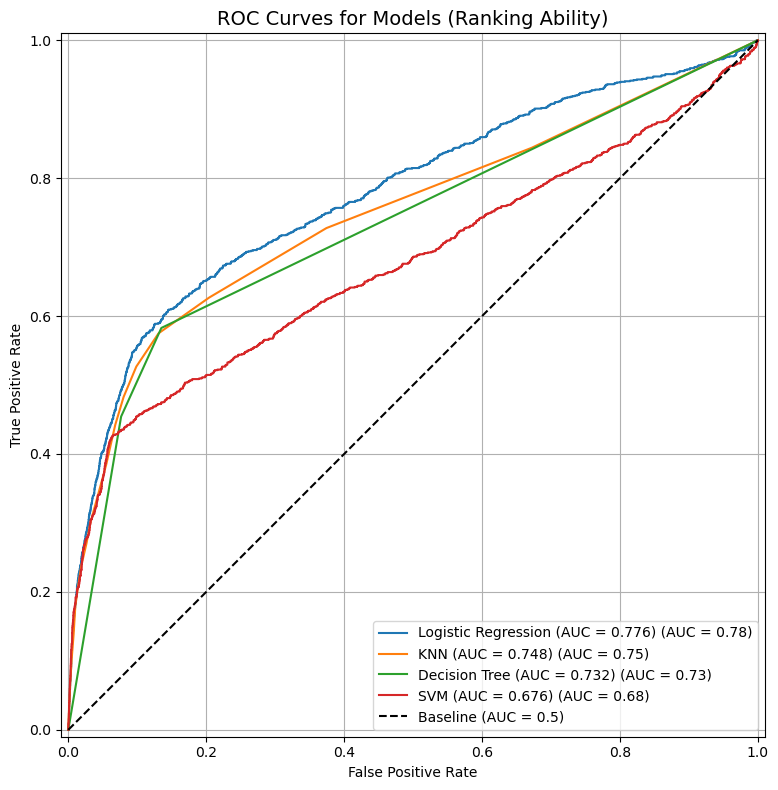

In [39]:
############# MODELS VISUALIZATION #############

from sklearn.metrics import RocCurveDisplay, roc_auc_score
import matplotlib.pyplot as plt
import numpy as np

# Generate predicted probabilities or scores
models = {
    'Logistic Regression': lr_grid,
    'KNN': knn_grid,
    'Decision Tree': dt_grid,
    'SVM': svm_grid
}

fig, ax = plt.subplots(figsize=(10, 8))

# Plot each ROC curve with AUC in the label
for name, model in models.items():
    y_proba = model.predict_proba(X_test)[:, 1]
    auc = roc_auc_score(y_test, y_proba)
    RocCurveDisplay.from_estimator(model, X_test, y_test, pos_label='yes',
                                   ax=ax, name=f'{name} (AUC = {auc:.3f})')

# Plot baseline
plt.plot([0, 1], [0, 1], 'k--', label='Baseline (AUC = 0.5)')

# Enhance plot aesthetics
plt.title('ROC Curves for Models (Ranking Ability)', fontsize=14)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)
plt.legend(loc='lower right', fontsize=10)
plt.tight_layout()
plt.show()

In [40]:
# Based on the ROC AUC score above, both Logistic Regression and SVM models are equally effective at ranking potential subscribers
# Logistic Regression trains significantly faster than SVM also it provides directly interpretable coefficients in order to understand which
# features influence subscription likelihood

In [48]:
# Get the fitted preprocessor
preprocessor = lr_pipe.named_steps['transformer']

# Get the fitted OneHotEncoder
ohe = preprocessor.transformers_[0][1]
ohe_feature_names = ohe.get_feature_names_out()

# Get the numeric columns passed through
numerical_part = preprocessor.transformers_[1][2]

# If it's a list of indices, convert to column names
if isinstance(numerical_part[0], int):
    numerical_feature_names = X_train.columns[numerical_part].tolist()
else:
    numerical_feature_names = numerical_part  # it's already a list of column names

# Combine all features
all_feature_names = np.concatenate([ohe_feature_names, numerical_feature_names])

# Get coefficients from the model
coefficients = lr_pipe.named_steps['lr'].coef_[0]

# Confirm the lengths match
print(f"Features: {len(all_feature_names)}, Coefficients: {len(coefficients)}")

# Create the DataFrame
coef_df = pd.DataFrame({
    'Feature': all_feature_names,
    'Coefficient': coefficients
}).sort_values(by='Coefficient', ascending=False)

# Plot top features
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature', data=coef_df.head(10))
plt.title('Top 10 Positive Coefficients (Logistic Regression)')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature', data=coef_df.tail(10))
plt.title('Top 10 Negative Coefficients (Logistic Regression)')
plt.tight_layout()
plt.show()

IndexError: index 15 is out of bounds for axis 0 with size 15